# Plot MAE vs. mutation matrix
We will plot average MAE performance of RF model over four validation seasons (from 2012NH to 2013SH) vs. 92 mutation matrices in AAindex database as well as binary encoding, where hyperparameters of the model were optimized separately for each mutation matrix.

Note: First run notebook "SuppFig6_part1_optimize_RF_mut_mat_hyperopt.ipynb" as this notebook depends on its results.

## Imports and configuration for plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
%matplotlib inline

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Paths and filenames

In [19]:
# paths
path_data   = "../results/SuppFig6_comparison/"
path_result = "../results/SuppFigS1_RF_mut_mat/"   # results will be saved in this directory

# filenames
optimize_fn = path_data+"SuppFig6_optimize_RF_mut_mat_hyperopt.csv"   # to save optimization results
fig_fn      = path_result+'SuppFigS1_RF_MAE_mut_mat_hyperopt.svg'   # to save figure

## Read optimization results and prepare data for plots

In [13]:
scores = pd.read_csv(optimize_fn)

# sort as per optimized mae
scores.sort_values(by=['mae'], ascending=True, inplace=True)

top5 = f"1. {scores.mut_mat.iloc[0]},   2. {scores.mut_mat.iloc[1]}\n3. {scores.mut_mat.iloc[2]},    4. {scores.mut_mat.iloc[3]}\n5. {scores.mut_mat.iloc[4]}"

In [9]:
scores.mae.min()

0.765224961776957

## Plot average MAE for optimized hyperparameters for each mutation matrix

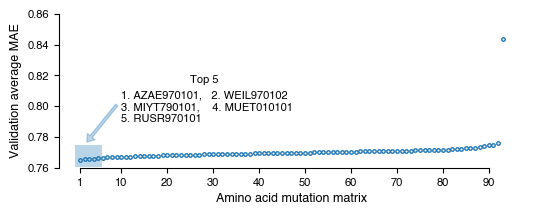

In [20]:
fig, ax = plt.subplots(figsize=(6, 2))

ax.plot(range(1, len(scores)+1), scores.mae.values,
        'o', fillstyle='none', markersize=2.5, color='C0')


# Top 5 substitution matrices
# Rectangle Patch
y0, y1 = ax.get_ylim()
rect_Yend = (y1-y0)/6
rect = Rectangle((0, y0-0.001), width=5.7, height=rect_Yend, alpha=0.3, zorder=0.5)
ax.add_patch(rect)

# annotation
ax.annotate('', xy=(2.5, y0+rect_Yend+0.001), xytext=(9, y0+rect_Yend+0.025),
            arrowprops=dict(facecolor='C0', edgecolor='C0', alpha=0.3,
                            width=2, headwidth=7, headlength=5),
            fontsize=8, zorder=0.1)

# text for top 5 mutation matrices
ax.text(25, 0.815, "Top 5", fontsize=8, fontweight='bold')
ax.text(10, 0.79, top5, fontsize=8)


# configurations for figure
ax.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_xticklabels([1, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_ylim(bottom=0.76, top=0.86)
ax.set_xlabel("Amino acid mutation matrix", fontsize=9)
ax.set_ylabel("Validation average MAE", fontsize=9)

sns.despine(trim=True)

# save figure
fig.savefig(fig_fn, format='svg', bbox_inches='tight')